#### Welcome to Assingment  3 of Machine Learning Course 5DV194! 
The task is to practice the unsupervised algorithm Principal Component Analysis (PCA) 
#### Deadline of Assignment 3:
23 March, 2021 (23:59:59 Stockholm time)


#### Goal 
To practice PCA for different applications (i.e., dimensionality reduction, data visualization, image compression). Additionally, to get familiar with the libraries (e.g., sklearn PCA as well as other common libraries such as pandas, matplotlib).
#### Dataset
MNIST dataset
https://www.kaggle.com/c/digit-recognizer/data
 

#### Grading (100 points)
Follow this jupyter notebook file below, you will find some tasks to complete by coding or answer questions.  
NO report is required for this assignment.

Upload this jupyter notebook file "Assignment3_PCA.ipynb" to Cambro/Drop Box.

## About PCA


Principal component analysis (PCA) is fundamentally a dimensionality reduction algorithm, which could be also useful for visualization, noise filtering and image compression etc.   In principal component analysis, we find a list of the principal axes (components) in the data which will be used to describe the dataset. In this assignment, we use Scikit-Learn's PCA estimator.

## Import some libraries
###### Same as in the  previous two assignmetns, you need to install these libraries at your computer if you do not have them.

In [1]:
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

##  Prepare data

In [2]:
# Load the MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#### Task-1: print the list of attribute names for variable 'mnist' by using the powerful inbuilt python function 'dir()'. (5 points)
#### If you never heard about this function, refer to https://www.w3schools.com/python/ref_func_dir.asp

In [3]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

#### Task-2: based on the printed attributes in task-1, assign the value for attribute 'data' in mnist to variable X, and the value of attribute 'target' to variable y.  (10 points) 

Note that value here does not always mean a real number, but could be an object (e.g.,array).

In [4]:
#Separate the data labels from the data set.
#We are doing this since MNIST is a dataset with labels, while PCA is unsupervised learning method without using labels for algorithm.  The labels would be still useful for demonstrating how PCA works.
X = mnist.data
y = mnist.target # labels

In [5]:
#Standardizing the data. Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

data = standardized_data

(70000, 784)


##  Basic about PCA
##### using Scikit-Learn

#### Task-3: complete the codes to output co-variance matrix (10 points)

In [6]:
#Hint: co-variance matrix is : A^T * A
# matrix multiplication using numpy
covar_matrix = np.matmul(data.T, data)
print("The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [7]:
from scipy.linalg import eigh
# A parameter 'eigvals' in function 'eigh' represents the index of eignvalues in asending order
# for example, we can generates the top 5 (779 -783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(779,783))  # Note that since spicy v1.5.0, use 'subset_by_index' instead of 'eigvals'
print("Shape of eigen vectors = ",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 5)
Updated shape of eigen vectors =  (5, 784)


In [8]:
import matplotlib.pyplot as plt
#projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, data.T)
print(new_coordinates.shape)

(5, 70000)


In [9]:
import pandas as pd
# appending label to the 5d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, y)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "3rd_principal", "4th_principal","5th_principal","label"))
print(dataframe.head())

  1st_principal 2nd_principal 3rd_principal 4th_principal 5th_principal label
0     -0.751001       8.06418      0.093038     -4.929711      -0.89172     5
1      0.891472      1.766171      3.714185      -7.51756       8.81353     0
2        4.3979     -1.479673      5.752488      9.824461      2.204835     4
3      5.606259      0.218098     -3.524017     -4.029669     -6.534627     1
4     -1.667989     -1.462658      6.182219      3.278848     -5.251618     9


## PCA for dimensionality reduction and data visualization 

Given the data in 784 dimensions as prepared above, we can use PCA to project them to a more manageable number of dimensions (say two). Refer to https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#### Task-4: initialize a PCA, and meanwhile specify number of components as two. Afterwards fit data into pca (10 points)

In [10]:
# initialize the pca 
pca = PCA(2) # project from 784 to 2 dimensions
pca_data = pca.fit_transform(data)  # fit the data into the initialized pca
# pca_reduced will contain the 2-d projection of the given data
print("shape of original shape = ", X.shape)
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of original shape =  (70000, 784)
shape of pca_reduced.shape =  (70000, 2)


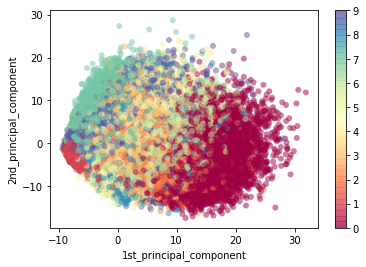

In [11]:
# Transform the string list of lables to integer list, since this is the required type for parameter c in the function plt.scatter 
label_list = [None]*len(y)
for i in range(0, len(y)): 
    label_list[i] = int(y[i])

# Plotting 
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=label_list, edgecolor='none', alpha=0.5,
            cmap = plt.cm.get_cmap("Spectral"))
 
plt.xlabel('1st_principal_component')
plt.ylabel('2nd_principal_component')
plt.colorbar();

Now think about how to choose the number of components? It is a vital part of using PCA in practice. The number of components can be determined by looking at the cumulative explained variance ratio as a function of the number of components. Below let's calcuate the cumulative explained variance ratio and visualize it.

###### Task-5:  Initialize pca, and configure the number of components (Let's see we want to keep 784 components). Note that, in task-4, you used one way to initialize the number of components you want to keep. Here provide a different way to configure the number of components.  (15 points)

In [12]:
from sklearn.decomposition import PCA
pca = PCA()  # initializing the pca
pca.n_components = data.shape[1] # configure the number of components
pca.fit(data)    # fit data into PCA


PCA(n_components=784)

In [13]:
#The amount of variance explained by each of the selected components (i.e., variance/eignvalue for each component).
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

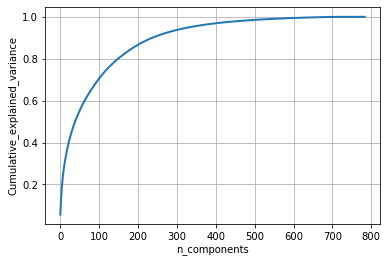

In [14]:
# Plot the PCA spectrum (n_component v.s. variance)
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Above the curve quantifies how much of the total, 784-dimensional variance is contained within the first N components.  Obviously here our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we definitely need higher number of components to retain higher vairance (for example, if we keep the top 300 components or even 200 components, the variance may be already high enough to meet your application need.  Anyway, looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

##  PCA for image compression 

###### Task-6:  Repeat what you already did above, initialize a PCA, assign the whole size of feature space to pca.n_components, fit data to pca.  (10 points)

In [15]:
pca = PCA(data.shape[1])  # initializing the pca, configure the number of components
pca.fit(data)    # fit data into PCA

PCA(n_components=784)

###### Task-7:  initialize another PCA with  0 < n_components < 1 (say 0.95) and fit data into pca in order to apply pca on the data, assign the output to variable X_reduced (5 points)

In [16]:
pca = PCA(.95)
X_reduced = pca.fit_transform(data)

#### Task-8 - question: what is the difference when the parameter n_components >1  and when  0 < n_components < 1  (5 points)

Answer: When "n_components >1", you are specifying a fixed number of components to select and you let the ratio of explained variance be dynamic (ie, with 12 compnenets, the explained variance could be 10% or it could be 74%, etc.).  When "0 < n_components < 1", you are specifying a fixed ratio for the explained variance that you want to achieve and you let the number of components that will be selected be dynamic (ie, you might achieve 95% explained ration with just 3 components, or it might require all of the componenets).

#### Task-9 - question: what is the difference between the function pca.fit( ) and pca.fit_transform( ) (5 points)

Answer: pca.fit() use the provided data to create a model that can be used to transform data. Using pca.fit_transofrm() creates the model and then applies that model to the provided data, and it returns the transformed data. The function pca.fit_transofrm() is a combination of two functions: pca.fit() and pca.transofrm().  That means you can fit a model with one set of data, and apply it to a different set of data (if it meets the needed conditions).

#### Task-10: print out the number of components retained in above pca model.  (5 points)

In [17]:
print(pca.components_.shape[0])

332


In [18]:
np.sum(pca.explained_variance_ratio_)

0.9500311796713794

#### Task-11: again initialize a PCA with  n_components = the output number from task-10, and fit data into this newly initialized pca (10 points)

In [19]:
pca = PCA(332)
X_reduced = pca.fit_transform(data)
X_recovered = pca.inverse_transform(X_reduced)

In the following, we are gonna visualize the original data and compressed data by PCA.

In [20]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)

Text(0.5, 1.0, 'Compressed')

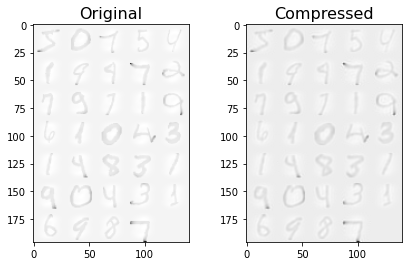

In [21]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(data[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#### Task-12:  tell me the good points in this assignment and limited points which can be further improved.  (10 points)

Answer: This really helped me understand PCA. I took other intro ML course and I really did not understand the concept well. I believe that this tutorial did a very good job going through the eigenvalues and then using matrix multiplication with the components to project the data into lower dimensions.

I think it would be helpful to show the importance of the scaler in the beginning. This already exists on scikitlearn (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), but I think it would be helpful for you to give a walkthrough of it in jupyter. I also think it would be helpful to use matplotlib to plot the vectors using 'quiver'. That would show the magnitude and direction of the vectors, this would help relate this back to the concept of vectors as directions. There are various examples of quiver on stackoverflow.

Some basic improvements are fixing some basic confusing points like inconsistent examples/typos. I 

#### Congratulations if you managed to run through above! 
#### Hope you find something interesting from this assignment.